### Can I predict if someone will transact off platform based on data up to 1 day before the stay?

#### There are a few items that we are currently looking at:  
- Is it a new owner
- Is it a new sitter
- Has the sitter had tickets before
- Is the word cash used?
- were phone numbers exchanged
- were both numbers exchanged
- did they say 'call me'
- days on the platform


In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://www.periscopedata.com/api/rover/chart/csv/03f30c64-64a2-3d42-b249-547e253b7023'
source = pd.read_csv(url)

In [133]:
source.head()

,conversation_id,diversion_tickets,first_diversion_ticket,last_diversion_ticket,trigger_content_type_id,is_diverting,id,requester_id,provider_id,convo_added,...,owner_email_verified,owner_stay_images_global_opt_out,owner_staff_notes,mg_added,mg_scheduled_for,days_until_mg,owner_response,happened,voice_calls,calls_duration
0,3451477,1,2016-11-11,2016-11-11,36,1,3451477,2103647,32413,2016-11-08,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,311.0
1,3134985,1,2016-11-15,2016-11-15,36,0,3134985,1944673,1287347,2016-09-25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,81.0
2,3515063,1,2016-11-18,2016-11-18,215,1,3515063,2133475,1920556,2016-11-16,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3246077,1,2016-11-01,2016-11-01,36,0,3246077,1998002,1585956,2016-10-11,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3410789,1,2016-11-04,2016-11-04,36,0,3410789,1054094,1037590,2016-11-03,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
source.shape

(2149, 56)

In [135]:
source.owner_gender.value_counts()

f    508
m    131
Name: owner_gender, dtype: int64

In [136]:
source.isnull().any().value_counts()

False    36
True     20
dtype: int64

In [137]:
data = source

In [138]:
data['happened'].fillna(3, inplace='True')
data.happened.value_counts()

3.0    1936
1.0     211
0.0       2
Name: happened, dtype: int64

In [139]:
data['mg_code'] = data.happened.map({3.0:0,0.0:1,1.0:2})

In [140]:
data.columns

Index([u'conversation_id', u'diversion_tickets', u'first_diversion_ticket',
       u'last_diversion_ticket', u'trigger_content_type_id', u'is_diverting',
       u'id', u'requester_id', u'provider_id', u'convo_added', u'start_date',
       u'days_til_start', u'service_type', u'provider_first_response_minutes',
       u'has_stay', u'is_repeat_customer', u'source', u'provider_group_id',
       u'need_id', u'requester_was_new_customer', u'years_of_experience',
       u'posted_on_craigslist', u'match_date', u'approved_on',
       u'sitter_user_id', u'sitter_account_added', u'dog_history', u'active',
       u'gender', u'birth_year', u'email_verified', u'ratings_average',
       u'ratings_count', u'testimonial_count', u'profile_quality',
       u'response_percent', u'response_time', u'marketing_partner',
       u'stay_images_global_opt_out', u'staff_notes', u'does_not_have_dogs',
       u'owner_user_id', u'owner_account_added', u'owner_active',
       u'owner_gender', u'owner_birth_year', u'o

In [141]:
data.isnull().any()

conversation_id                     False
diversion_tickets                   False
first_diversion_ticket              False
last_diversion_ticket               False
trigger_content_type_id             False
is_diverting                        False
id                                  False
requester_id                        False
provider_id                         False
convo_added                         False
start_date                          False
days_til_start                      False
service_type                        False
provider_first_response_minutes      True
has_stay                            False
is_repeat_customer                  False
source                              False
provider_group_id                   False
need_id                             False
requester_was_new_customer          False
years_of_experience                  True
posted_on_craigslist                False
match_date                           True
approved_on                       

In [143]:
data.voice_calls.fillna(0, inplace=True)

In [144]:
data.calls_duration.fillna(0, inplace=True)

In [147]:
data.years_of_experience.mean() #13.1875
data.years_of_experience.fillna(13.0, inplace=True)

In [148]:
data.approved_on.isnull().sum()

256

In [150]:
data.gender.value_counts()

f    1692
m     292
Name: gender, dtype: int64

In [152]:
data.gender.fillna('u', inplace=True)
data['gender_map'] = data.gender.map({'u':0,'m':1,'f':2})

In [153]:
data.isnull().any()

conversation_id                     False
diversion_tickets                   False
first_diversion_ticket              False
last_diversion_ticket               False
trigger_content_type_id             False
is_diverting                        False
id                                  False
requester_id                        False
provider_id                         False
convo_added                         False
start_date                          False
days_til_start                      False
service_type                        False
provider_first_response_minutes      True
has_stay                            False
is_repeat_customer                  False
source                              False
provider_group_id                   False
need_id                             False
requester_was_new_customer          False
years_of_experience                 False
posted_on_craigslist                False
match_date                           True
approved_on                       

In [154]:
data.staff_notes.fillna('none',inplace=True)
data.owner_staff_notes.fillna('none',inplace=True)

In [155]:
data.isnull().any().sum()

13

In [175]:
data['overnight']=data.service_type.map({'dog-walking':0,'doggy-day-care':0,'drop-in':0,'overnight-boarding':1,'overnight-traveling':1})

In [170]:
data = pd.concat([data,pd.get_dummies(data['service_type'],prefix='svc')],axis=1)

In [176]:
data.columns

Index([u'conversation_id', u'diversion_tickets', u'first_diversion_ticket',
       u'last_diversion_ticket', u'trigger_content_type_id', u'is_diverting',
       u'id', u'requester_id', u'provider_id', u'convo_added', u'start_date',
       u'days_til_start', u'service_type', u'provider_first_response_minutes',
       u'has_stay', u'is_repeat_customer', u'source', u'provider_group_id',
       u'need_id', u'requester_was_new_customer', u'years_of_experience',
       u'posted_on_craigslist', u'match_date', u'approved_on',
       u'sitter_user_id', u'sitter_account_added', u'dog_history', u'active',
       u'gender', u'birth_year', u'email_verified', u'ratings_average',
       u'ratings_count', u'testimonial_count', u'profile_quality',
       u'response_percent', u'response_time', u'marketing_partner',
       u'stay_images_global_opt_out', u'staff_notes', u'does_not_have_dogs',
       u'owner_user_id', u'owner_account_added', u'owner_active',
       u'owner_gender', u'owner_birth_year', u'o

In [190]:
test_columns = ['conversation_id',
                'diversion_tickets',
                'days_til_start',
                'has_stay',
                'is_repeat_customer',
                'requester_was_new_customer',
                'provider_group_id',
                'years_of_experience',
                'ratings_average',
                'ratings_count',
                'testimonial_count',
                'profile_quality',
                'stay_images_global_opt_out',
                'staff_notes',
                'does_not_have_dogs',
                'owner_staff_notes',
                'calls_duration',
                'voice_calls',
                'mg_code',
                'gender_map',
                'is_diverting',
               'svc_dog-walking',
               'svc_doggy-day-care',
               'svc_drop-in',
               'svc_overnight-boarding',
               'svc_overnight-traveling',
               'overnight']

In [191]:
datax = data[test_columns]

In [194]:
datax.shape

(2149, 27)

## TEXT MESSAGES

In [204]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [205]:
url = 'https://www.periscopedata.com/api/rover/chart/csv/7e83add1-206b-397c-a792-5ecb31e9959c'
df_text = pd.read_csv(url)

In [206]:
df_text.head()

,id,conversation_id,sent,sender_id,recipient_id,content,read
0,19,10,2011-08-16,4,1,NICE!!,1
1,79,40,2011-09-07,313,4,Wait...since I'm driving out there twice each ...,1
2,133,61,2011-09-26,128,501,okay $50,1
3,183,48,2011-10-04,181,128,I think that would be a great idea. Want to m...,1
4,234,88,2011-10-11,1,683,"Yeah, you're welcome. I hope you enjoy your cr...",1


In [209]:
df_text.isnull().sum()

id                  0
conversation_id     0
sent                0
sender_id           0
recipient_id        0
content            12
read                0
dtype: int64

In [210]:
df_text.fillna('none', inplace=True)

In [211]:
X = df_text.content

In [218]:
vect = CountVectorizer(ngram_range=(4, 10))
X_dtm = vect.fit_transform(X)
X_dtm.shape

(5000, 1452200)

In [213]:
print vect.get_feature_names()[-50:]

[u'zip over', u'zip so', u'ziya', u'ziya and', u'zoe', u'zoe and', u'zoe but', u'zoe for', u'zoe is', u'zoe likes', u'zoey', u'zoey during', u'zoey is', u'zoey my', u'zoey or', u'zoey sounds', u'zone', u'zone and', u'zone but', u'zone strip', u'zoo', u'zoo and', u'zoo animals', u'zoo are', u'zoo at', u'zoo for', u'zoo in', u'zoo know', u'zoo on', u'zoo thanks', u'zoo while', u'zoology', u'zoology considered', u'zoology will', u'zu', u'zu and', u'zuzu', u'zuzu off', u'zwick', u'zwick 805', u'\u0436\u044b\u0432', u'\u0436\u044b\u0432 ut', u'\u0436\u044b\u0432\u043e\u0442\u043d\u043e\u0435', u'\u0436\u044b\u0432\u043e\u0442\u043d\u043e\u0435 \u043f\u043e\u043f\u044f\u0447\u044c\u0441\u044f', u'\u043f\u043e\u043f\u044f\u0447\u044c\u0441\u044f', u'\u043f\u043e\u043f\u044f\u0447\u044c\u0441\u044f \u0436\u044b\u0432', u'\u043f\u044b\u0448\u044c', u'\u043f\u044b\u0448\u044c \u0436\u044b\u0432\u043e\u0442\u043d\u043e\u0435', u'\u043f\u044b\u0448\u044c \u043f\u044b\u0448\u044c', u'\u5385\u9b42\u

In [219]:
vect = CountVectorizer(stop_words='english', ngram_range=(4,10))
tf = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())
tf.shape

(5000, 601519)

In [226]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(df_text.content)
features = vect.get_feature_names()
dtm.shape

(5000, 11020)

In [233]:
from textblob import TextBlob, Word
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(df_text))
        review_text = unicode(df_text.content[review_id], 'utf-8')
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
     
    # print the review
    print '\n' + review_text

In [234]:
summarize()

TOP SCORING WORDS:
energy
gigi
recouped
play
grain

Gigi is a 3.5yr old labradoodle and she has a lot of energy. She plays well with others including small dogs but she loves to play. She'll lay down after awhile but once her energy is recouped she'll want to play some more. I'm thinking with 3 other dogs she'll get worn out fast. She's up to date on her shots but has allergies, to I think grain, so I feed her a certain food and treats. She listens to commands and is really really sweet.  If you're available I'd like her to meet your dogs first to see if she'll be okay. 


## Plots

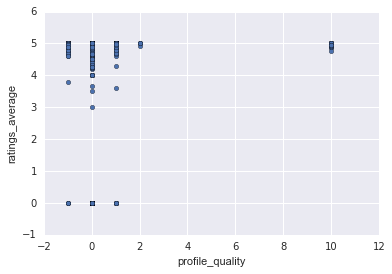

In [125]:
data.plot(kind='scatter', x='profile_quality', y='ratings_average')

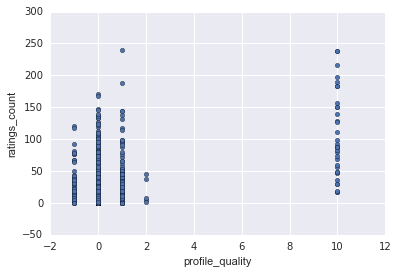

In [126]:
data.plot(kind='scatter', x='profile_quality', y='ratings_count')

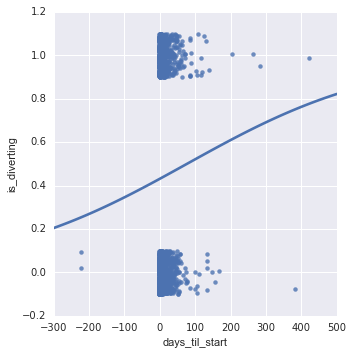

In [169]:
sns.lmplot(x='days_til_start', y='is_diverting', data=datax, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.1)


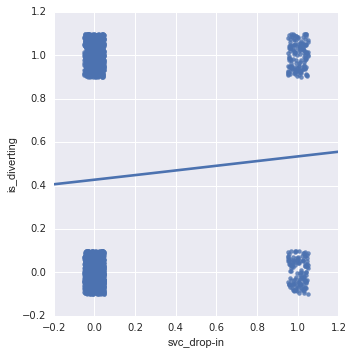

In [183]:
sns.lmplot(x='svc_drop-in', y='is_diverting', data=datax, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.1)

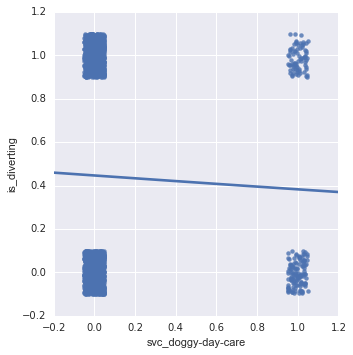

In [184]:
sns.lmplot(x='svc_doggy-day-care', y='is_diverting', data=datax, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.1)

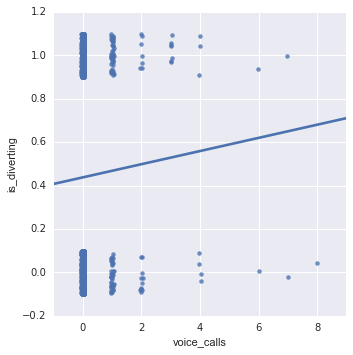

In [198]:
sns.lmplot(x='voice_calls', y='is_diverting', data=datax, ci=None, x_jitter=0.05, y_jitter=0.1)

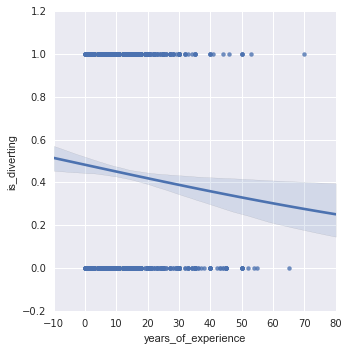

In [78]:
sns.lmplot(x='years_of_experience', y='is_diverting', data=data, logistic=True)

In [79]:
data.diversion_tickets.value_counts()

1    2059
2      48
3       2
Name: diversion_tickets, dtype: int64

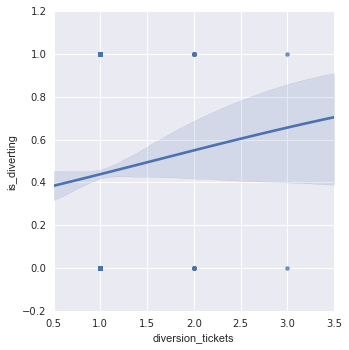

In [80]:
sns.lmplot(x='diversion_tickets', y='is_diverting', data=data, logistic=True)

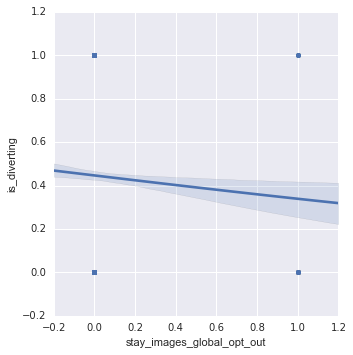

In [201]:
sns.lmplot(x='stay_images_global_opt_out', y='is_diverting', data=datax, logistic=True)

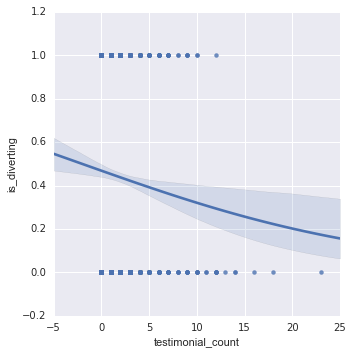

In [202]:
sns.lmplot(x='testimonial_count', y='is_diverting', data=datax, logistic=True)

In [235]:
from sklearn.tree import DecisionTreeRegressor

In [236]:
datax.columns

Index([u'conversation_id', u'diversion_tickets', u'days_til_start',
       u'has_stay', u'is_repeat_customer', u'requester_was_new_customer',
       u'provider_group_id', u'years_of_experience', u'ratings_average',
       u'ratings_count', u'testimonial_count', u'profile_quality',
       u'stay_images_global_opt_out', u'staff_notes', u'does_not_have_dogs',
       u'owner_staff_notes', u'calls_duration', u'voice_calls', u'mg_code',
       u'gender_map', u'is_diverting', u'svc_dog-walking',
       u'svc_doggy-day-care', u'svc_drop-in', u'svc_overnight-boarding',
       u'svc_overnight-traveling', u'overnight'],
      dtype='object')

In [250]:
feature_cols = ['diversion_tickets',
                'requester_was_new_customer',
                'ratings_average',
                'svc_drop-in',
                'years_of_experience',
               'ratings_count',
               'voice_calls',
               'days_til_start']

In [251]:
X = datax[feature_cols]

In [252]:
X.head()

,diversion_tickets,requester_was_new_customer,ratings_average,svc_drop-in,years_of_experience,ratings_count,voice_calls,days_til_start
0,1,1,5.0,0.0,15.0,10,2.0,11
1,1,1,5.0,0.0,15.0,15,1.0,4
2,1,1,0.0,0.0,6.0,0,0.0,0
3,1,1,0.0,1.0,15.0,0,0.0,5
4,1,0,5.0,0.0,20.0,12,0.0,0


In [253]:
y = datax['is_diverting']

In [254]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

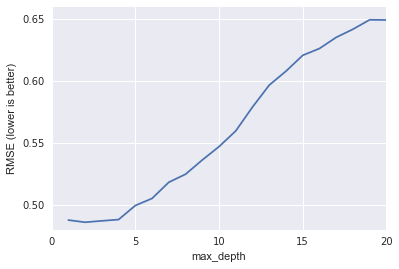

In [255]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [256]:
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.4860409590177851, 2)

In [257]:
# max_depth=2 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [258]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
5,ratings_count,0.910983
4,years_of_experience,0.089017
0,diversion_tickets,0.000000
1,requester_was_new_customer,0.000000
2,ratings_average,0.000000
3,svc_drop-in,0.000000
6,voice_calls,0.000000
7,days_til_start,0.000000
